# Portfolio construction

In [1]:
%load_ext autoreload 
%autoreload 2
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append('../')

In [4]:
import matplotlib.pyplot as mpl,seaborn as sns
import numpy as np
import pandas as pd
from scipy.linalg import block_diag
from sklearn.covariance import LedoitWolf 

In [5]:
from opm.hrp.datasets import build_block_matrix, build_true_matrix
from opm.hrp.datasets import simulate_covariance_mean



from opm.cluster.OptimalClustering import OptimalClustering



In [6]:
from opm.nco.nco import get_minimum_variance_portfolio_weights
from opm.nco.nco import get_maximum_sharpe_portfolio_weights
from opm.nco.nco import nco


In [7]:
from opm.hrp.utils import *

In [8]:
!pip install git+https://github.com/omroot/signalrazor.git


  Cloning https://github.com/omroot/signalrazor.git to /private/var/folders/lm/4shz7d3x35q2c4bp8kddjc640000gn/T/pip-req-build-q6xzxacb
  Running command git clone -q https://github.com/omroot/signalrazor.git /private/var/folders/lm/4shz7d3x35q2c4bp8kddjc640000gn/T/pip-req-build-q6xzxacb
  Resolved https://github.com/omroot/signalrazor.git to commit 7fe77918885546a7b1db5f963369f73a9c46fae6


In [9]:
import signalrazor

In [10]:
from signalrazor import CleanseMatrix
from signalrazor import covariance2correlation
from signalrazor import compute_pca

In [11]:
number_blocks, block_size, block_correlation = 2, 2, .5


In [12]:
true_correlation = build_block_matrix(number_blocks=number_blocks ,
                                       block_size = block_size,
                                       block_correlation = block_correlation)


In [13]:
true_correlation.shape

(4, 4)

In [14]:
eigenvalues, eigenvectors = np.linalg.eigh(true_correlation)

In [15]:
true_condition_number = max(eigenvalues)/min(eigenvalues)

In [16]:
print(f'True condition number: {true_condition_number}')

True condition number: 3.0


<Axes: >

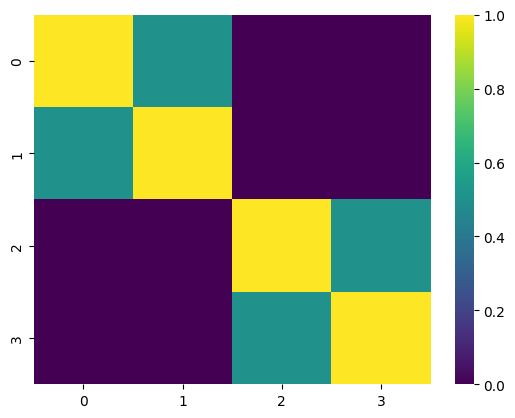

In [17]:
sns.heatmap(true_correlation,cmap='viridis')

In [18]:

true_correlation_1 = block_diag(build_block_matrix(number_blocks=1 ,
                                       block_size = 2,
                                       block_correlation = 0.5))



In [19]:
true_correlation_1

array([[1. , 0.5],
       [0.5, 1. ]])

In [20]:
true_correlation_2 = build_block_matrix(number_blocks=1 ,
                                       block_size = 2,
                                       block_correlation = 0)

In [21]:
true_correlation_2

array([[1., 0.],
       [0., 1.]])

In [22]:
true_correlation_1=block_diag(true_correlation_1,true_correlation_2)

In [23]:
true_correlation_1

array([[1. , 0.5, 0. , 0. ],
       [0.5, 1. , 0. , 0. ],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. ]])

In [24]:
eigenvalues_1, eigenvectors_1 = np.linalg.eigh(true_correlation_1)

In [25]:
true_condition_number_1 = max(eigenvalues_1)/min(eigenvalues_1)

In [26]:
true_condition_number_1

3.0

<Axes: >

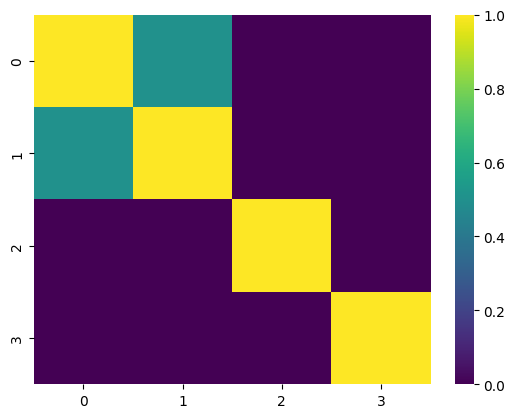

In [27]:
sns.heatmap(true_correlation_1,cmap='viridis')

## The nested clustered optimization algorithm

### Correlation clustering 

In [28]:
number_blocks, block_size, block_correlation = 10,50, 0.5

In [29]:

np.random.seed(0)
true_mu,true_covariance=build_true_matrix(number_blocks = number_blocks,
                                              block_size = block_size ,
                                              block_correlation = block_correlation)

In [30]:
true_covariance

,90,254,283,445,461,15,316,489,159,153,...,211,9,359,195,251,323,192,117,47,172
90,0.014156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
254,0.000000,0.003214,0.004818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.005307,0.000000,0.000000,0.00000,0.000000,0.000000
283,0.000000,0.004818,0.028890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.015912,0.000000,0.000000,0.00000,0.000000,0.000000
445,0.000000,0.000000,0.000000,0.003788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
461,0.000000,0.000000,0.000000,0.000000,0.016339,0.000000,0.000000,0.012394,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003921,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.003295,0.000000,0.00000,0.000000,0.000000
192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006896,0.002597,...,0.0,0.000000,0.0,0.005726,0.000000,0.000000,0.008823,0.00000,0.000000,0.003567
117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.02473,0.000000,0.000000
47,0.000000,0.000000,0.000000,0.000000,0.000000,0.005412,0.000000,0.000000,0.000000,0.000000,...,0.0,0.008207,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.012705,0.000000


<Axes: >

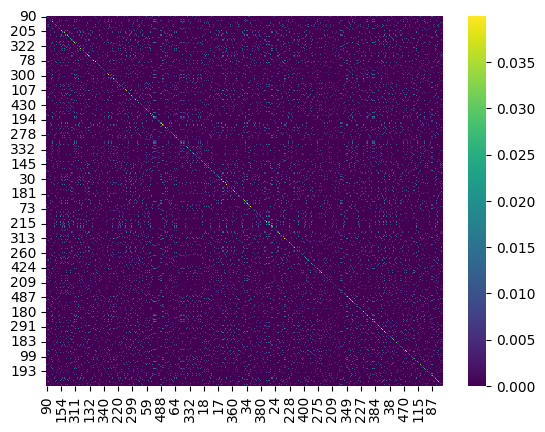

In [31]:
sns.heatmap(true_covariance,cmap='viridis')

In [32]:
eigenvalues, eigenvectors=compute_pca(true_covariance)

<Axes: >

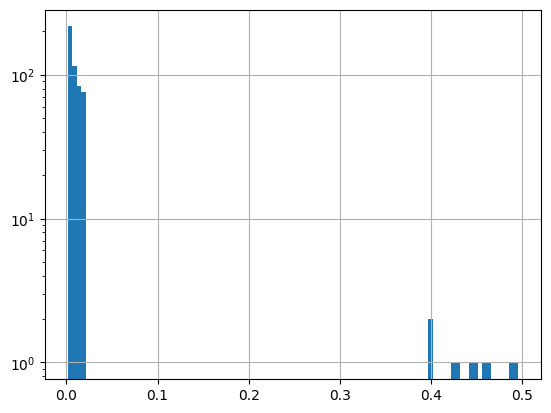

In [33]:
pd.Series(np.diag(eigenvalues)).hist(bins=100, log = True)

In [34]:
column_name = true_covariance.columns

In [35]:
covariance_matrix_cleanser = CleanseMatrix(  use_shrinkage = False,
                                             shrinkage_regularizer = 0.01,
                                             detone = False,
                                             market_components_max_index =1,
                                             grid_size = 100,
                                             kernel = 'gaussian',
                                             cv = 2,
                                             min_bandwidth_grid_exponent = -3,
                                             max_bandwidth_grid_exponent  = 1,
                                             bandwidth_grid_size = 250,
                                             initial_variance  = 0.5,
                                             epsilon = 1e-5,
                                             min_q = 10,
                                             max_q = 10,
                                             q_grid_size = 1,
                                             verbose = True)

In [36]:
covariance_matrix_cleanser.fit(true_covariance)

For q=10.0, the optimal variance is 1.0 , and objective function is 69.0,and max random eigen value: 1.73,and # of signal factors: 0
(500, 500)
[[ 1.73160917e-02 -5.74778649e-19 -9.96506188e-19 ...  1.62727192e-20
   5.04407493e-20 -2.87343923e-20]
 [-5.74778649e-19  1.73160917e-02 -1.21972744e-19 ... -2.40096496e-19
  -1.33209507e-19 -5.84240181e-20]
 [-9.96506188e-19 -6.77626358e-20  1.73160917e-02 ...  2.31860093e-18
   4.45561287e-19 -7.89010041e-19]
 ...
 [ 1.62727192e-20 -2.40096496e-19  2.31860093e-18 ...  1.73160917e-02
   2.80069490e-18 -1.93244564e-18]
 [ 5.04407493e-20 -1.33209507e-19  4.45561287e-19 ...  2.80069490e-18
   1.73160917e-02 -3.74478548e-19]
 [-2.87343923e-20 -5.84240181e-20 -7.89010041e-19 ... -1.93244564e-18
  -3.74478548e-19  1.73160917e-02]]
[[ 1.73160917e-02 -5.74778649e-19 -9.96506188e-19 ...  1.62727192e-20
   5.04407493e-20 -2.87343923e-20]
 [-5.74778649e-19  1.73160917e-02 -1.21972744e-19 ... -2.40096496e-19
  -1.33209507e-19 -5.84240181e-20]
 [-9.96506

<Axes: >

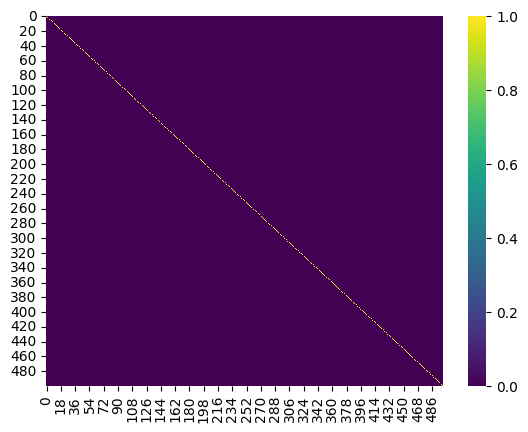

In [37]:
sns.heatmap(covariance_matrix_cleanser.cleansed_matrix,cmap='viridis')

In [38]:
covariance_matrix_cleanser.estimated_number_signal_factors

0

In [39]:
true_covariance_cleansed=pd.DataFrame(covariance_matrix_cleanser.cleansed_matrix,index=column_name,columns=column_name)

In [40]:
true_correlation_cleansed = covariance2correlation(true_covariance_cleansed)

In [41]:
true_correlation_cleansed.shape

(500, 500)

In [42]:
optimal_clustering_model = OptimalClustering(n_jobs=8, 
                                             is_input_correlation = False,
                                             max_number_clusters=20)
optimal_clustering_model.fit(true_covariance)

Clustering using the Silhouette method


In [43]:
optimal_clustering_model.n_clusters

10

In [44]:
optimal_clustering_model.reordered_X

,356,385,364,368,388,394,374,381,357,382,...,339,322,318,340,311,338,315,313,302,310
356,0.005896,0.006602,0.006012,0.004962,0.005811,0.002536,0.006506,0.007242,0.006804,0.003707,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
385,0.006602,0.029570,0.013463,0.011112,0.013013,0.005679,0.014570,0.016218,0.015237,0.008302,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
364,0.006012,0.013463,0.024517,0.010118,0.011849,0.005171,0.013267,0.014767,0.013875,0.007559,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
368,0.004962,0.011112,0.010118,0.016702,0.009780,0.004268,0.010950,0.012188,0.011452,0.006239,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
388,0.005811,0.013013,0.011849,0.009780,0.022908,0.004998,0.012824,0.014274,0.013412,0.007307,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003591,0.010276,0.010404,0.004434,0.006328,0.011366,0.005862,0.010529,0.006232,0.010048
315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003705,0.010600,0.010731,0.004573,0.006528,0.005862,0.012093,0.010860,0.006429,0.010364
313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.006654,0.019038,0.019274,0.008214,0.011725,0.010529,0.010860,0.039012,0.011547,0.018615
302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003939,0.011270,0.011410,0.004862,0.006940,0.006232,0.006429,0.011547,0.013670,0.011020


<Axes: >

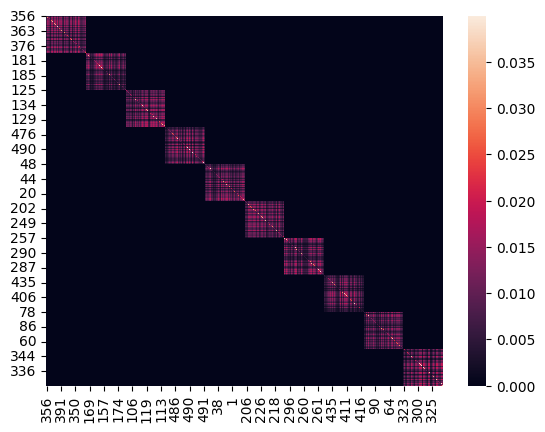

In [45]:

sns.heatmap(optimal_clustering_model.reordered_X)#,cmap='viridis')

### Intracluster weights

The second step of the NCO algorithm is to compute optimal intracluster allocations, using the denoised covariance matrix, `true_covariance_cleansed`. 

The code in this section implements this procedure. 

For simplicity purposes, we have defaulted to a minimum variance allocation, as implemented in the `get_minimum_variance_portfolio_weights` function. 

However, nothing in the procedure prevents the use of alternative allocation methods. 

Using the estimated intracluster weights, we can derive the reduced covariance matrix, `reduced_covariance_matrix`, which reports the correlations between clusters.

In [46]:
optimal_clustering_model.clusters.keys()
    
    
    

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
intracluster_weights =pd.DataFrame(0,index=true_covariance_cleansed.index,columns=optimal_clustering_model.clusters.keys())

In [48]:
for i in optimal_clustering_model.clusters:
    _cov_matrix = true_correlation_cleansed.loc[optimal_clustering_model.clusters[i], optimal_clustering_model.clusters[i]] 
    _pt_weights = get_minimum_variance_portfolio_weights(_cov_matrix)
    intracluster_weights.loc[optimal_clustering_model.clusters[i],i]=_pt_weights

In [49]:
intracluster_weights

,0,1,2,3,4,5,6,7,8,9
90,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.02,0.00
254,0.0,0.00,0.00,0.00,0.00,0.0,0.02,0.00,0.00,0.00
283,0.0,0.00,0.00,0.00,0.00,0.0,0.02,0.00,0.00,0.00
445,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.02,0.00,0.00
461,0.0,0.00,0.00,0.02,0.00,0.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
323,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.02
192,0.0,0.02,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
117,0.0,0.00,0.02,0.00,0.00,0.0,0.00,0.00,0.00,0.00
47,0.0,0.00,0.00,0.00,0.02,0.0,0.00,0.00,0.00,0.00


In [50]:
# reduced covariance matrix, reports the correlation between clusters 
reduced_covariance_matrix=intracluster_weights.T.dot(np.dot(true_covariance_cleansed,intracluster_weights)) 

In [51]:
reduced_covariance_matrix

,0,1,2,3,4,5,6,7,8,9
0,2.000000e-02,-9.616407e-19,-3.326664e-20,-2.967694e-19,5.222608e-19,-7.762330e-19,-6.474033e-19,2.538525e-19,6.193151e-19,-3.737579e-19
1,-9.616407e-19,2.000000e-02,-1.457563e-20,1.952216e-19,1.485388e-19,3.944481e-18,-2.105939e-19,5.217648e-19,-2.335008e-19,4.826531e-19
2,-3.326664e-20,-1.457563e-20,2.000000e-02,1.612189e-19,1.038951e-19,1.951659e-19,9.937114e-20,6.336390e-19,3.088822e-19,-8.173413e-19
3,-2.967694e-19,1.952216e-19,1.612189e-19,2.000000e-02,4.949790e-19,9.989376e-21,-2.108547e-19,4.049304e-18,-6.254434e-19,4.727301e-20
4,5.222608e-19,1.485388e-19,1.038951e-19,4.949790e-19,2.000000e-02,-2.505973e-19,-1.282895e-19,-9.933985e-20,-3.832456e-20,-1.178473e-17
5,-7.762330e-19,3.944481e-18,1.951659e-19,9.989376e-21,-2.505973e-19,2.000000e-02,-2.885788e-19,1.497063e-20,-3.101168e-19,2.645378e-19
6,-6.474033e-19,-2.105939e-19,9.937114e-20,-2.108547e-19,-1.282895e-19,-2.885788e-19,2.000000e-02,7.517619e-19,-2.350274e-20,4.489088e-19
7,2.538525e-19,5.217648e-19,6.336390e-19,4.049304e-18,-9.933985e-20,1.497063e-20,7.517619e-19,2.000000e-02,5.218579e-19,3.822780e-19
8,6.193151e-19,-2.335008e-19,3.088822e-19,-6.254434e-19,-3.832456e-20,-3.101168e-19,-2.350274e-20,5.218579e-19,2.000000e-02,4.432675e-19
9,-3.737579e-19,4.826531e-19,-8.173413e-19,4.727301e-20,-1.178473e-17,2.645378e-19,4.489088e-19,3.822780e-19,4.432675e-19,2.000000e-02


### Intercluster Weights


The third step of the NCO algorithm is to compute optimal intercluster allocations, using the reduced covariance matrix, `reduced_covariance_matrix`. 

By construction, this covariance matrix is close to a diagonal matrix, and the optimization problem is close to the ideal Markowitz case. 

In other words, the clustering and intracluster optimization steps have allowed us to transform a "Markowitz-cursed" problem ($\mid\rho \mid >> 0 $) into a well-behaved problem ($\rho \approx 0$).

The code in the below implements this procedure. 

It applies the same allocation procedure that was used in the intracluster allocation step (that is, the `get_minimum_variance_portfolio_weights` function). 

The final allocation per security is reported by the wAll0 data frame, which results from multiplying intracluster weights with the intercluster weights.

In [52]:

intercluster_weights=pd.Series(get_minimum_variance_portfolio_weights(reduced_covariance_matrix).flatten(),
                         index=reduced_covariance_matrix.index) 

final_portfolio_weights=intracluster_weights.mul(intercluster_weights,axis=1).sum(axis=1).sort_index()

In [53]:
final_portfolio_weights.shape

(500,)

In [54]:
final_portfolio_weights.describe()

count    5.000000e+02
mean     2.000000e-03
std      2.893696e-18
min      2.000000e-03
25%      2.000000e-03
50%      2.000000e-03
75%      2.000000e-03
max      2.000000e-03
dtype: float64

### NCO Algorithm

## Experimental results 

In this section we subject the NCO algorithm to controlled experiments, and compare its performance to Markowitz’s approach. 

Like in the Denoising-Detoning chapter, we discuss two characteristic portfolios of the efficient frontier, namely:
- the minimum variance and 
- maximum Sharpe ratio solutions, 
since any member of the unconstrained efficient frontier can be derived as a convex combination of the two (a result sometimes known as the "separation theorem").

Code Snippet 7.6 implements the NCO algorithm introduced earlier in this section. 



### Minimum variance portfolio 

We create:
- a random vector of means and 
- a random covariance matrix 
that represent a stylized version of a fifty securities portfolio, grouped in ten blocks with intracluster correlations of 0.5. 

This vector and matrix characterize the "true" process that generates observations.

We set a seed for the purpose of reproducing and comparing results across runs with different parameters. 



In [55]:
number_blocks, block_size, block_correlation = 10,50, 0.5
np.random.seed(0)
true_mu,true_covariance=build_true_matrix(number_blocks = number_blocks,
                                              block_size = block_size ,
                                              block_correlation = block_correlation)


In [56]:
true_covariance.reset_index(drop=True, inplace=True)
true_covariance.columns = sorted(true_covariance.columns.tolist())

<Axes: >

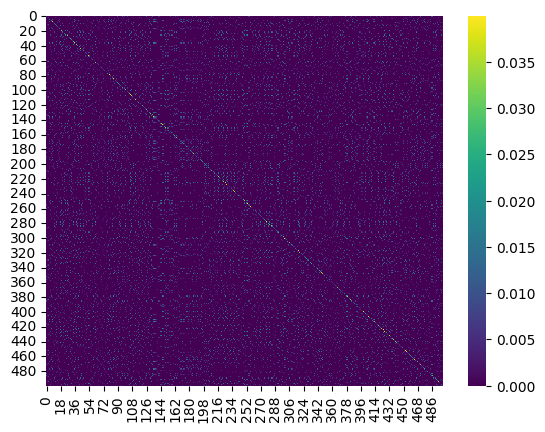

In [57]:
sns.heatmap(true_covariance,cmap='viridis')

Then we simulate a random empirical vector of means and a random empirical covariance matrix based on 1,000 observations drawn from the true process. 

Using that empirical covariance matrix,
-  we can estimate the minimum variance portfolio according to Markowitz, and 
-  estimate the minimum variance portfo- lio applying the NCO algorithm. 

This procedure is repeated on 1,000 different random empirical covariance matrices. 

In [58]:
number_observations, number_simulations , shrink, min_variance_portfolio=1000,2,False, True
np.random.seed(0)
markowitz_weights=pd.DataFrame(columns=range(true_covariance.shape[0]),
                                index=range(number_simulations),dtype=float) 
nco_weights=markowitz_weights.copy(deep=True)

for i in range(number_simulations):
    
    sample_mu, sample_covariance =simulate_covariance_mean(true_mu=true_mu,
                                                             true_covariance = true_covariance ,
                                                             number_of_observations = number_observations,
                                                             shrink =shrink  )
    markowitz_weights.loc[i] = get_minimum_variance_portfolio_weights(sample_covariance).flatten()
    nco_weights.loc[i] = nco(covariance = sample_covariance,
                            mu = None,
                            max_number_clusters= 10,
                            n_jobs=20)#int(sample_covariance.shape[0]/5))#.flatten()  
    


Clustering using the Silhouette method
Optimal number of clusters identified : 10
Clustering using the Silhouette method
Optimal number of clusters identified : 10


In [59]:
# Compute the true allocation
true_w=get_minimum_variance_portfolio_weights(true_covariance) 

In [60]:

true_w=np.repeat(true_w.T,markowitz_weights.shape[0],axis=0)

In [61]:
true_w.shape

(2, 500)

In [62]:
markowitz_weights.shape

(2, 500)

In [63]:
nco_weights.shape

(2, 500)

In [64]:
np.mean(((true_w - markowitz_weights).values.flatten()**2)**.5)

0.003659748946497532

In [65]:
np.mean(((true_w - nco_weights).values.flatten()**2)**.5)

0.0008846679502710327

### Maximum Sharpe Ratio Portfolio 

In [66]:
 
maxsharpe_markowitz_weights=pd.DataFrame(columns=range(true_covariance.shape[0]),
                                index=range(number_simulations),dtype=float) 
maxsharpe_nco_weights=markowitz_weights.copy(deep=True)

for i in range(number_simulations):
    
    sample_mu, sample_covariance =simulate_covariance_mean(true_mu=true_mu,
                                                             true_covariance = true_covariance ,
                                                             number_of_observations = number_observations,
                                                             shrink =shrink  )
    maxsharpe_markowitz_weights.loc[i] = get_maximum_sharpe_portfolio_weights(sample_covariance, sample_mu).flatten()
    maxsharpe_nco_weights.loc[i] = nco(covariance = sample_covariance,
                            mu = sample_mu,
                            max_number_clusters= 10,
                            n_jobs=20)#int(sample_covariance.shape[0]/5))#.flatten()  
    


Clustering using the Silhouette method
Optimal number of clusters identified : 10
Clustering using the Silhouette method
Optimal number of clusters identified : 10


In [67]:
# Compute the true allocation
maxsharpe_true_w=get_maximum_sharpe_portfolio_weights(true_covariance, true_mu) 

In [68]:
maxsharpe_true_w=np.repeat(maxsharpe_true_w.T,maxsharpe_markowitz_weights.shape[0],axis=0)

In [69]:
np.mean(((maxsharpe_true_w - maxsharpe_markowitz_weights).values.flatten()**2)**.5)

0.10808166764752344

In [70]:
np.mean(((maxsharpe_true_w - maxsharpe_nco_weights).values.flatten()**2)**.5)

0.021130405457659308